## streamml2
<hr>

Example usage of ModelSelection

Model Selection Params:

`def flow(self, 
         models_to_flow=[], 
         params=None, 
         test_size=0.2, 
         nfolds=3, 
         nrepeats=3,
         pos_split=1,
         n_jobs=1, 
         metrics=[], 
         verbose=False, 
         regressors=True,
         modelSelection=False,
         cut=None):`

Model Selection Models:

`regression_options = {"lr" : linearRegression,
                       "svr" : supportVectorRegression,
                       "rfr":randomForestRegression,
                       "abr":adaptiveBoostingRegression,
                       "knnr":knnRegression,
                       "ridge":ridgeRegression,
                       "lasso":lassoRegression,
                       "enet":elasticNetRegression,
                       "mlpr":multilayerPerceptronRegression,
                       "br":baggingRegression,
                       "dtr":decisionTreeRegression,
                       "gbr":gradientBoostingRegression,
                       "gpr":gaussianProcessRegression,
                       "hr":huberRegression,
                       "tsr":theilSenRegression,
                       "par":passiveAggressiveRegression,
                       "ard":ardRegression,
                       "bays_ridge":bayesianRidgeRegression,
                       "lasso_lar":lassoLeastAngleRegression,
                       "lar":leastAngleRegression}`

`classification_options = {'abc':adaptiveBoostingClassifier,
                          'dtc':decisionTreeClassifier,
                          'gbc':gradientBoostingClassifier,
                            'gpc':guassianProcessClassifier,
                            'knnc':knnClassifier,
                            'logr':logisticRegressionClassifier,
                            'mlpc':multilayerPerceptronClassifier,
                            'nbc':naiveBayesClassifier,
                            'rfc':randomForestClassifier,
                            'sgd':stochasticGradientDescentClassifier,
                            'svc':supportVectorClassifier}`

In [1]:
!pip install -U streamml2

Requirement already up-to-date: streamml2 in c:\users\bmccs\appdata\local\continuum\anaconda3\lib\site-packages (0.1)


In [1]:
from streamml2.streams import ModelSelectionStream
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.datasets import load_boston
boston=load_boston()
X=pd.DataFrame(boston['data'], columns=boston['feature_names'])
y=pd.DataFrame(boston['target'],columns=["target"])

regression_options={"lr" : 0,
                   "svr" : 0,
                   "rfr":0,
                   "abr":0,
                   "knnr":0,
                   "ridge":0,
                   "lasso":0,
                   "enet":0,
                   "mlpr":0,
                   "br":0,
                   "dtr":0,
                   "gbr":0,
                   "gpr":0,
                   "hr":0,
                   "tsr":0,
                   "par":0,
                   "ard":0,
                   "bays_ridge":0,
                   "lasso_lar":0,
                   "lar":0}
results_dict = ModelSelectionStream(X,y).flow(list(regression_options.keys()),
                                                                    params={},
                                                                    metrics=[],
                                                                    test_size=0.5,
                                                                    nfolds=10,
                                                                    nrepeats=10,
                                                                    verbose=False, 
                                                                    regressors=True,
                                                                    stratified=True, 
                                                                    cut=y['target'].mean(),
                                                                    modelSelection=True,
                                                                    n_jobs=3)

print("Best Models ... ")
print(results_dict["models"])
print("Final Errors ... ")
print(pd.DataFrame(results_dict["final_errors"]))
print("Metric Table ...")
print(pd.DataFrame(results_dict["avg_kfold"]))
print("Significance By Metric ...")
for k in results_dict["significance"].keys():
    print(k)
    print(results_dict["significance"][k])

Constructed LinearRegressorPredictiveModel: lr


ValueError: not enough values to unpack (expected 5, got 0)

Constructed AdaptiveBoostingClassifierPredictiveModel: abc
Constructed DecisionTreeClassifierPredictiveModel: dtc
Constructed GradientBoostingClassifierPredictiveModel: gbc
Constructed GaussianProcessClassifier PredictiveModel: gpc
Constructed KNNClassifierPredictiveModel: knnc
Constructed LogisticRegressionClassifierPredictiveModel: logr
Constructed MultilayerPerceptronClassifierPredictiveModel: mlpc
Constructed NaiveBayesClassifierPredictiveModel: nbc
Constructed RandomForestClassifierPredictiveModel: rfc
Constructed StochasticGradientDescentClassifierPredictiveModel: sgdc
Constructed SupportVectorClassifierPredictiveModel: svc
**************************************************
Determining Best Estimators.
**************************************************
Returning abc best estiminator
Returning dtc best estiminator
Returning gbc best estiminator
Returning gpc best estiminator
Returning knnc best estiminator
Returning logr best estiminator
Returning mlpc best estiminator
Returning n

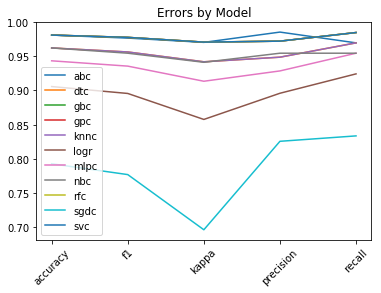

*****************************************
=> (Classifier) => Performance Sheet
*****************************************
                abc       dtc       gbc       gpc      knnc      logr  \
accuracy   0.926444  0.935556  0.945917  0.949278  0.946917  0.907472   
f1         0.921968  0.932040  0.944836  0.946053  0.942984  0.889425   
kappa      0.888919  0.901769  0.918207  0.922036  0.918285  0.855357   
precision  0.935151  0.946944  0.958444  0.964611  0.963111  0.921135   
recall     0.928889  0.935278  0.946944  0.945556  0.942222  0.892222   

               mlpc       nbc       rfc      sgdc       svc  
accuracy   0.955278  0.948917  0.938917  0.698194  0.959278  
f1         0.950213  0.947040  0.938124  0.602751  0.957331  
kappa      0.930620  0.922097  0.907715  0.547531  0.937611  
precision  0.968460  0.960556  0.952444  0.585146  0.970000  
recall     0.948889  0.948056  0.941111  0.684444  0.956944  


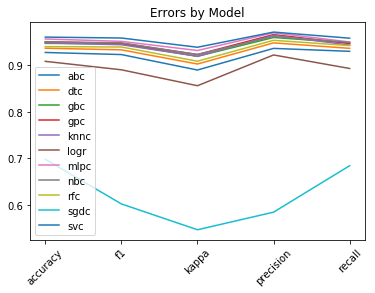

*****************************************************************************************
=> (Classifier) => (Two Tailed T-test) =>(Calculating Statistical Differences In Means)
*****************************************************************************************
Best Models ... 
{'abc': AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None), 'dtc': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'gbc': GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decreas

In [4]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_iris
iris=load_iris()
X=pd.DataFrame(iris['data'], columns=iris['feature_names'])
y=pd.DataFrame(iris['target'], columns=['target'])
classification_options = {'abc':0,
                          'dtc':0,
                          'gbc':0,
                            'gpc':0,
                            'knnc':0,
                            'logr':0,
                            'mlpc':0,
                            'nbc':0,
                            'rfc':0,
                            'sgd':0,
                            'svc':0}
results_dict = ModelSelectionStream(X,y).flow(list(classification_options.keys()),
                                            params={},
                                            metrics=[],
                                            test_size=0.35,
                                            nfolds=10,
                                            nrepeats=10,
                                            verbose=False, 
                                            regressors=False,
                                            stratified=True,
                                            stats=True,
                                            modelSelection=True,
                                            n_jobs=3)

print("Best Models ... ")
print(results_dict["models"])
print("Final Errors ... ")
print(pd.DataFrame(results_dict["final_errors"]))
print("Metric Table ...")
print(pd.DataFrame(results_dict["avg_kfold"]))
print("Significance By Metric ...")
for k in results_dict["significance"].keys():
    print(k)
    print(results_dict["significance"][k])

## Parameters
### Regression
<hr>
<p> All model objects behave with their <code>sklearn</code> API interface via the <code>params</code> prefixed by a modelCode__param </p>

Constructed AdaptiveBoostingRegressorPredictiveModel: abr
Constructed RandomForestRegressorPredictiveModel: rfr
Constructed LinearRegressorPredictiveModel: lr
Constructed DecisionTreeRegressor: dtr
Constructed GradientBoostingRegressor: gbr
Constructed MultilayerPerceptronRegressor: mlpr
Constructed KNeighborsRegressorRegressorPredictiveModel: knnr
**************************************************
Determining Best Estimators.
**************************************************
Returning abr best estiminator
Returning rfr best estiminator
Returning lr best estiminator
Returning dtr best estiminator
Returning gbr best estiminator
Returning mlpr best estiminator
Returning knnr best estiminator
*************************************************************
=> (Final Results) => True Error Between Xtrain Xtest
*************************************************************
                            abr       rfr        lr       dtr       gbr  \
explained_variance     0.939357  0.953743  0.91

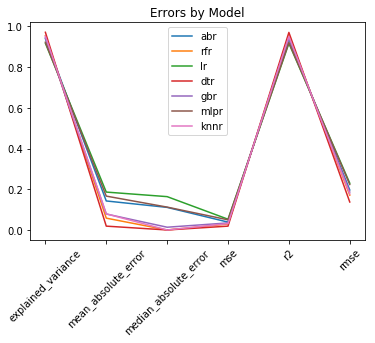

*****************************************
=> (Regressor) => Performance Sheet
*****************************************
                            abr       rfr        lr       dtr       gbr  \
explained_variance     0.947920  0.937635  0.923288  0.902651  0.923463   
mean_absolute_error    0.121031  0.058911  0.162845  0.062222  0.072579   
median_absolute_error  0.067691  0.000000  0.113343  0.000000  0.005214   
mse                    0.036088  0.038546  0.048041  0.062222  0.047090   
r2                     0.936974  0.932195  0.913893  0.894541  0.916213   
rmse                   0.184013  0.157755  0.213701  0.174634  0.173947   

                           mlpr      knnr  
explained_variance     0.945858  0.953590  
mean_absolute_error    0.129109  0.077333  
median_absolute_error  0.085497  0.005000  
mse                    0.034795  0.031400  
r2                     0.939062  0.943443  
rmse                   0.178805  0.151486  


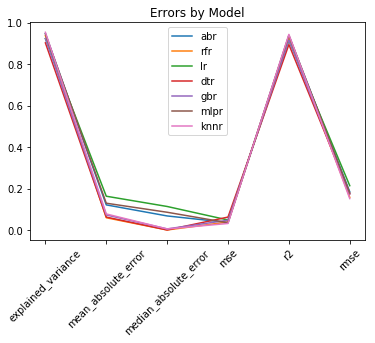

*****************************************************************************************
=> (Regressor) => (Two Tailed T-test) =>(Calculating Statistical Differences In Means)
*****************************************************************************************
Best Models ... 
{'abr': AdaBoostRegressor(base_estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
         learning_rate=1.0, loss='linear', n_estimators=150,
         random_state=None), 'rfr': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 'lr': LinearRegression(copy_X=T

In [8]:
params={'abr__base_estimator':[LinearRegression(), SVR(), RandomForestRegressor()],
        'abr__n_estimators':[50, 100, 150],
        'rfr__n_estimators':[50, 100, 150],
        'knnr__n_neighbors':[5,10,15],
        'mlpr__hidden_layer_sizes':[(100), (100,100)],
        'mlpr__alpha':[1e-5,1e-4,1e-3,1e-2,1e-1],
        'mlpr__activation':['identity','logistic','relu','tanh'],
        'mlpr__learning_rate':['constant','invscaling']}


results_dict = ModelSelectionStream(X,y).flow(["abr","rfr","lr","dtr", "gbr", "mlpr","knnr"],
                                            params=params,
                                            metrics=[], #use all metrics if empty
                                            test_size=0.35,
                                            nfolds=10,
                                            nrepeats=10,
                                            verbose=False, 
                                            regressors=True,
                                            stratified=False,
                                            stats=True,
                                            modelSelection=True,
                                            n_jobs=3)

print("Best Models ... ")
print(results_dict["models"])
print("Final Errors ... ")
print(pd.DataFrame(results_dict["final_errors"]))
print("Metric Table ...")
print(pd.DataFrame(results_dict["avg_kfold"]))
print("Significance By Metric ...")
for k in results_dict["significance"].keys():
    print(k)
    print(results_dict["significance"][k])

Constructed AdaptiveBoostingClassifierPredictiveModel: abc
Constructed RandomForestClassifierPredictiveModel: rfc
Constructed LogisticRegressionClassifierPredictiveModel: logr
Constructed DecisionTreeClassifierPredictiveModel: dtc
Constructed GradientBoostingClassifierPredictiveModel: gbc
Constructed MultilayerPerceptronClassifierPredictiveModel: mlpc
Constructed StochasticGradientDescentClassifierPredictiveModel: sgdc
Constructed KNNClassifierPredictiveModel: knnc
**************************************************
Determining Best Estimators.
**************************************************
Returning abc best estiminator
Returning rfc best estiminator
Returning logr best estiminator
Returning dtc best estiminator
Returning gbc best estiminator
Returning mlpc best estiminator
Returning sgdc best estiminator
Returning knnc best estiminator
*************************************************************
=> (Final Results) => True Error Between Xtrain Xtest
*******************************

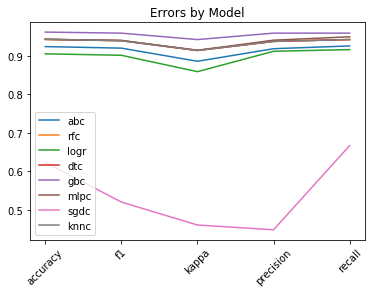

*****************************************
=> (Classifier) => Performance Sheet
*****************************************
                abc       rfc      logr       dtc       gbc      mlpc  \
accuracy   0.949899  0.964960  0.934253  0.941303  0.947747  0.989646   
f1         0.949966  0.964598  0.928907  0.939881  0.946402  0.989206   
kappa      0.924744  0.947158  0.899831  0.911348  0.921102  0.984249   
precision  0.959000  0.973111  0.956778  0.952944  0.957667  0.992667   
recall     0.952222  0.965278  0.930000  0.941111  0.947778  0.988889   

               sgdc      knnc  
accuracy   0.693404  0.987646  
f1         0.598307  0.987262  
kappa      0.539962  0.981218  
precision  0.568220  0.990722  
recall     0.689444  0.986944  


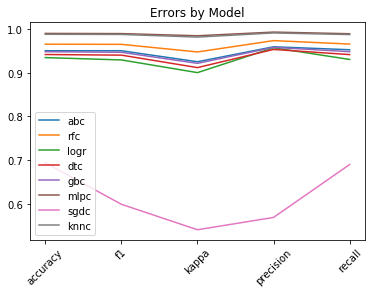

*****************************************************************************************
=> (Classifier) => (Two Tailed T-test) =>(Calculating Statistical Differences In Means)
*****************************************************************************************
Best Models ... 
{'abc': AdaBoostClassifier(algorithm='SAMME',
          base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
          learning_rate=1.0, n_estimators=50, random_state=None), 'rfc': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), 'logr': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          inter

In [10]:
params={ 'abc__algorithm':['SAMME'],
         'abc__base_estimator':[LogisticRegression(), SVC(), GaussianNB(), RandomForestClassifier()],
        'abc__n_estimators':[50, 100, 150],
        'rfc__n_estimators':[50, 100, 150],
        'knnc__n_neighbors':[5,10,15],
        'mlpc__hidden_layer_sizes':[(100), (100,100)],
        'mlpc__alpha':[1e-5,1e-4,1e-3,1e-2,1e-1],
        'mlpc__activation':['identity','logistic','relu','tanh'],
        'mlpc__learning_rate':['constant','invscaling']}


results_dict = ModelSelectionStream(X,y).flow(["abc","rfc","logr","dtc", "gbc", "mlpc", "sgd","knnc"],
                                            params=params,
                                            metrics=[], #use all metrics if empty
                                            test_size=0.35,
                                            nfolds=10,
                                            nrepeats=10,
                                            verbose=False, 
                                            regressors=False,
                                            stratified=True,
                                            stats=True,
                                            modelSelection=True,
                                            n_jobs=3)

print("Best Models ... ")
print(results_dict["models"])
print("Final Errors ... ")
print(pd.DataFrame(results_dict["final_errors"]))
print("Metric Table ...")
print(pd.DataFrame(results_dict["avg_kfold"]))
print("Significance By Metric ...")
for k in results_dict["significance"].keys():
    print(k)
    print(results_dict["significance"][k])

In [2]:
!where python

C:\Users\bmccs\AppData\Local\Continuum\anaconda3\python.exe
